In [1]:
import os
import numpy as np

In [131]:
# building the dataset
DATASET = {'mice':[],
           'days':[],
           'folders':[]}

data_folder = '/Volumes/YANN/Marcel_data/'
days = [d for d in os.listdir(data_folder) if '._' not in d]
for day in days:
    mice = [f for f in os.listdir(os.path.join(data_folder, day)) if '.DS' not in f]
    for m in mice:
        folders = [f for f in os.listdir(os.path.join(data_folder, day, m)) if '.DS' not in f]
        for f in folders:
            DATASET['mice'].append(m)
            DATASET['days'].append(day)
            DATASET['folders'].append(os.path.join(data_folder, day, m, f))

In [130]:
# getting one datafile
desired_data = 'TSeries-01192022-1602-001'
for i, f in enumerate(DATASET['folders']):
    if desired_data in f:
        folder = DATASET['folders'][i]

In [90]:
import pickle
with open(os.path.join(folder, 'Analysis_Data.pickle'), 'rb') as f:
    data = pickle.load(f)

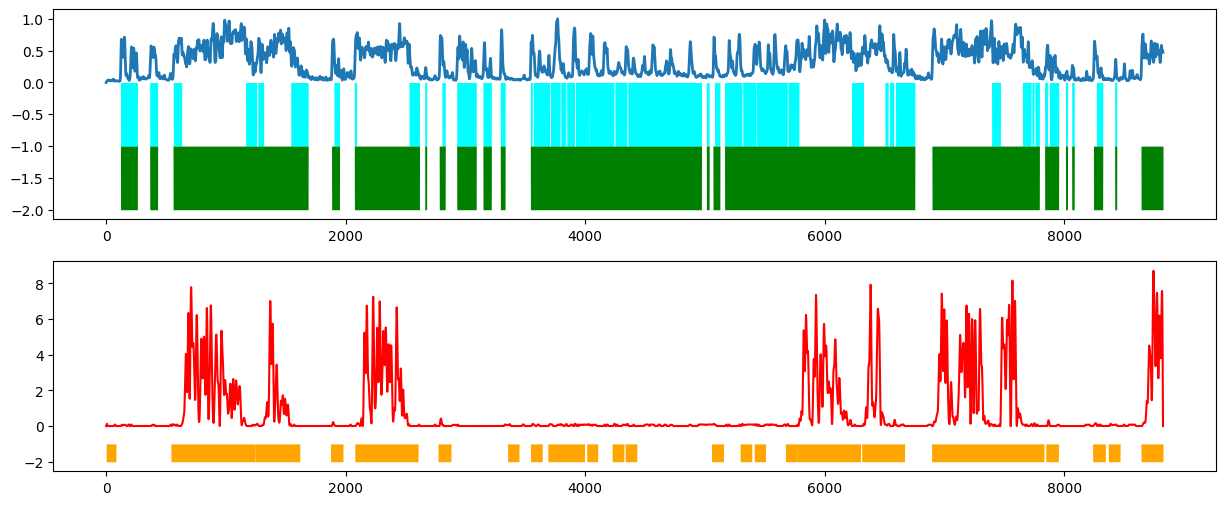

In [121]:
fig, AX = plt.subplots(2, 1, figsize=(15,6))
AX[0].plot(data['Whisking_data']['normalized_trace'], lw=2)
wo = data['Whisking_data']['whisking only']['binary']
AX[0].fill_between(range(len(wo)), 0*wo, -wo, color='cyan', lw=0)
w = data['Whisking_data']['binary_whisking']
AX[0].fill_between(range(len(w)), -1+0*w, -1-w, color='green', lw=0)
AX[1].plot(data['Locomotion_data']['speed'], 'r')
w = data['Locomotion_data']['extended_binary_movement']
AX[1].fill_between(range(len(w)), -1+0*w, -1-w, color='orange', lw=0)

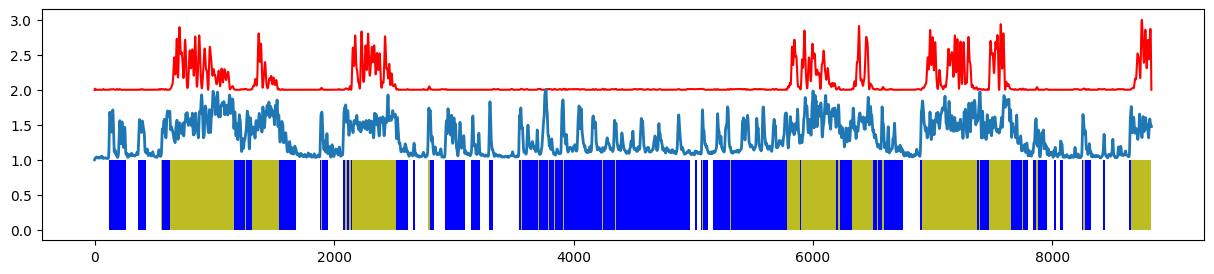

In [126]:
fig, ax = plt.subplots(1, figsize=(15,3))
#w = data['Whisking_data']['binary_whisking']
ax.plot(data['Locomotion_data']['speed']/data['Locomotion_data']['speed'].max()+2., 'r')
ax.plot(data['Whisking_data']['normalized_trace']+1, lw=2)

#ax.fill_between(range(len(w)), 0*w, -w, color='tab:olive', lw=0)
#w = data['Locomotion_data']['binary_movement']
#wo = data['Locomotion_data']['loc']
for i in data['Whisking_data']['location_bouts']:
    ax.fill_between(x=[i[0], i[1]-1], y1=0, y2=1, color='blue', lw=0)
for i in data['Locomotion_data']['events']['location']:
    ax.fill_between(x=[i[0], i[1]-1], y1=0, y2=1, color='tab:olive', lw=0)
#ax.fill_between(range(len(wo)), 0*wo, -wo, color='blue', lw=0)
#ax.fill_between(range(len(w)), -1+0*w, -1-w, color='orange', lw=0)